# Byron Dennis - Assignment 4
Applying data mining algorithms to text!

### Overview

For this assignment I chose to use a dataset with job posting to see if it would be possible to predict job titles based on job requirements.  For the purposes of this analysis I selected a handful of job titles to focus on.

'Accountant','Lawyer','Software Developer','Project Manager','Sales manager','Chief Accountant','Web Developer','Java Developer','Office Manager'

I was curious to see if the model would have trouble differentiating chief accountants and accountants.  I also thought the model may have trouble with web developers, java developers, and software developers.

https://www.kaggle.com/madhab/jobposts

The dataset consists of 19,000 job postings that were posted through the Armenian human resource portal CareerCenter. The data was extracted from the Yahoo! mailing group https://groups.yahoo.com/neo/groups/careercenter-am. This was the only online human resource portal in the early 2000s. A job posting usually has some structure, although some fields of the posting are not necessarily filled out by the client (poster). The data was cleaned by removing posts that were not job related or had no structure. The data consists of job posts from 2004-2015 


## Question 1
Write a short description of the results of these “baseline” models. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
- What decisions did you make when creating your feature space? Why?
- How do these classifiers address your question?
- How did your models perform? What performance measure did you use?  Why? 
- Are you happy with the results?  Why or why not?

## Answer 1

#### Base Line Model Performance

The three baseline models used to predict job titles based on job requirements were a logistic regression, decision tree, and a K Nearest Neigbor model.  Logistic regression models estimate log odds for each observation that can be turned into probabilities to make a predictions.  Decision trees find the features that provide the most information to make a prediction and create an "if then" logic to classify data.  The KNN model identifies the specified number of observations (k) that are closest to the target and classifies based on those observations.

The accuracy of the baseline models were a good starting point, but need additional work.  The logistic regression was an early stand out with 84% accuracy which was five percentage points greater than the next best model (Decision Tree).  The overall precision and recall were almost identical to the model accuracy, but as I suspected each classifier had trouble differentiating the various types of developers and accountants.  When the logistic regression predicted a job posting to be for a web developer it was only correct 66% of the time (precision).  The recall statistic for Java Developers was 62% which tells us that only 62% of total number of Java Developers were classified correctly.  The ineraction between precision and recall for Java Developers and Web Developers leads me to believe that Web Developers are being classified as Java Developers.

My initial feature space was created by removing common english words that seemed to provided little or no value such as "we", "our" and "he".  There were also more specific job description words that were removed that provided no value to the analysis (e.g. llc, company, work, seeking, position, looking , candidate, incumbent and activities).  A additional option I applied to my initial feature space was to exclude words that appeared in 90% or more of the job descriptions.  When words appear in the majority of job descriptions they do not add any predictive value to the models and add additional noise when trying to figure out which words are truly important.  The final option I applied was to use counts rather than binary word indicators as I thought the frequency of certain words could be useful to the models.

In [68]:
summarydf1

,Model,Accuracy
0,Decision Tree (initial),0.789474
1,Logistic Regression initial,0.839009
2,K Nearest Neighbors initial (k=3),0.718266


#### Initial Logistic Regression Metrics

In [61]:
print(metrics.classification_report(clf2_expected, clf2_predicted))

                    precision    recall  f1-score   support

        Accountant       0.81      0.87      0.84        87
  Chief Accountant       0.76      0.71      0.74        49
    Java Developer       0.89      0.62      0.73        26
            Lawyer       1.00      1.00      1.00        45
    Office Manager       1.00      0.90      0.95        20
   Project Manager       1.00      0.89      0.94        35
Software Developer       0.75      0.79      0.77        34
     Web Developer       0.66      0.85      0.74        27

       avg / total       0.85      0.84      0.84       323



## Question 2
Write a short description of the improvement you were able to make in your prediction. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
- What combination of classifiers and settings did you use and why?
- Which model fit “best” and what metric did you use for the comparison? Why? 
- Are you happy with the results? Why or why not?  What could you do to improve on the “best” model’s performance?


## Answer 2
After making several changes to my baseline models I was able to increase overall model accuracy from 84% to 87% using the logistic regression.  Precision and recall both increased from 85% to 87%.  I am still not satisfied with the final model because it still struggles to classify developers (especially java developers) and could use improvement when predicting chief accountants.  

To improve the model fit I tried a variety of preprocessing options as well as different count vectorizer settings.  My first test was to find the optimal k for the KNN model to see if that would improve the KNN model.  It turns out that the optimal k reported was 1 which makes me uncomfortable because so little information is being taken into account to make a prediction.  The performance of the KNN model was only slightly improved by using the "optimal" k, so I decided to focus soley on improving the logistic regression model.

The most impactful changes I made were changing my test/train ratio and using the binary setting for the count vectorizer.  The baseline models were developed using a 70/30 split for testing and training.  The dataset I was using only included 1,074 records.  Changing the test/train split to 80/20 gave the model more information which led to increased accuracy.  I believe using binary values from the count vectorizer improved the model because it allowed key words that were mentioned less often too have greater importance in the model. 

Other options I tried included removing additional stopwords, stemming (reduced model performance) and using tfidf weights.  One additional action that could be taken to improve the model would be to identify the words that the developer positions have in common and which words are exclusive to each position to see if there are additional changes that can be made to the stopwords that would improve the model.  I am concerned that some of the innaccuracy can be attributed to poor job description data.

In [125]:
summarydf

,Model,Accuracy
0,Decision Tree (initial),0.789474
1,Logistic Regression initial,0.839009
2,K Nearest Neighbors initial (k=3),0.718266
3,K Nearest Neighbors (k=1 optimal),0.733746
4,Logistic Regression binary CV,0.851393
5,Decision Tree binary CV,0.743034
6,"Logistic Regression 80/20, binary = True",0.869767
7,"Logistic Regression 80/20, binary, Stem",0.832558
8,"Logistic Regression 80/20, Stem, stopwords",0.818605
9,"Logistic Regression 80/20, tfidf",0.818605


#### Best Logistic Regression Model Metrics

In [127]:
print(metrics.classification_report(clf5_expected, clf5_predicted))

                    precision    recall  f1-score   support

        Accountant       0.87      0.91      0.89        57
  Chief Accountant       0.82      0.79      0.81        34
    Java Developer       0.83      0.59      0.69        17
            Lawyer       1.00      1.00      1.00        28
    Office Manager       1.00      0.93      0.97        15
   Project Manager       1.00      0.90      0.95        21
Software Developer       0.74      0.92      0.82        25
     Web Developer       0.78      0.78      0.78        18

       avg / total       0.87      0.87      0.87       215



## Question 3
Write a short description of the outcome of your clustering exercise. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
- How many clusters did you “find”? Why did you select that number? 
- Can you easily describe your clusters with a text label?  If so, what are the labels and how do they help?  If not, why not? 


## Answer 3

I chose to look for 8 clusters because that is the number of distinct job titles that were included in my data set.  After running the clustering model I created a summary with the count of each job description within each cluster.  Some clusters were clearly separated.  For example, one cluster contained almost all of the lawyers and another cluster contained all of the developer positions (web, software and java developers).  However, 5 separate clusters were created that included accountants and  chief accountants.  The analysis also grouped project managers and office managers together.

I cannot easily describe all of the clusters based on the groupings of job descriptions because multiple clusters were created for the same job descriptions.  Even though the clusters are not clearly defined at this point two things could come out of this analysis.  I could try to change the number of clusters from 8 to a lesser number to see if the jobs would be classified in a more meaningful way (i.e. one cluster for accounts, one cluster for developers, etc.).  I could also leave the clusters in their current state and further evaluate the difference is in job descriptions to see if the job descriptions need more clarification or title changes.  Perhaps the cluster results are indicating vague job descriptions or poorly classified job requirements.

## Task 1 - Baseline Models

In [38]:
# Housekeeping

import pandas as pd
import numpy as np
from __future__ import division

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk

pd.set_option('display.max_colwidth', 18000)

pathname = "C:/Users/byron/OneDrive/Documents/Text Mining/Job_Posts/"

In [78]:
# Get data

df = pd.read_csv(pathname + "data job posts.csv")

print(df.shape)
print(list(df))


(19001, 24)
['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary', 'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach', 'Year', 'Month', 'IT']


In [79]:
#df.head()

In [80]:
# Remove NAs
jobdf = df[df.JobRequirment.notnull()]

# Choose specific job titles to classify

value_list = ['Accountant','Lawyer','Software Developer','Project Manager','Sales manager','Chief Accountant','Web Developer','Java Developer','Office Manager']
jobdf = jobdf[jobdf.Title.isin(value_list)]

print(jobdf.shape)

(1074, 24)


In [81]:
#jobdf.JobRequirment.head()

In [82]:
# Initial Vectorizer Review
prelim = CountVectorizer(stop_words='english', max_df = .9)
prelim_dm = prelim.fit_transform(jobdf['JobRequirment'])

print(prelim_dm.shape)

names = prelim.get_feature_names()

count = np.sum(prelim_dm.toarray(), axis = 0).tolist()

count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)

(1074, 3493)


In [83]:
# Custom Stop Words

from nltk.corpus import stopwords

nltk_stopwords = stopwords.words("english")

my_stopwords = nltk_stopwords + ['llc','company','work','seeking','position','looking','candidate'
                                 ,'incumbent','activities']

In [128]:
# instantiate vectorizer(s)
cv = CountVectorizer(stop_words=my_stopwords,
                     max_df=.9)

tfidf = TfidfVectorizer(stop_words=my_stopwords,
                     max_df=.9)


# fit text
cv_dm = cv.fit_transform(jobdf['JobRequirment'])
tfidf_dm = tfidf.fit_transform(jobdf['JobRequirment'])

print(cv_dm.shape)

names = cv.get_feature_names()

count = np.sum(cv_dm.toarray(), axis = 0).tolist()

count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)

# print(names)

(1074, 3550)


In [85]:
# train test split
# data are X, labels are y
from sklearn.model_selection import train_test_split

X = cv_dm.toarray() 
print(type(X))

y = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(751, 3560)
(323, 3560)
(751,)
(323,)


## Decision Tree

In [86]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

clf1_nm = "Decision Tree (initial)"

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.789473684211
accuracy: 0.789473684211
                    precision    recall  f1-score   support

        Accountant       0.77      0.76      0.76        87
  Chief Accountant       0.60      0.73      0.66        49
    Java Developer       0.94      0.58      0.71        26
            Lawyer       1.00      0.96      0.98        45
    Office Manager       0.94      0.80      0.86        20
   Project Manager       1.00      0.77      0.87        35
Software Developer       0.81      0.76      0.79        34
     Web Developer       0.62      0.96      0.75        27

       avg / total       0.82      0.79      0.79       323



## Logistic Regression

In [87]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf2_nm = "Logistic Regression initial"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.839009287926
accuracy: 0.839009287926
                    precision    recall  f1-score   support

        Accountant       0.81      0.87      0.84        87
  Chief Accountant       0.76      0.71      0.74        49
    Java Developer       0.89      0.62      0.73        26
            Lawyer       1.00      1.00      1.00        45
    Office Manager       1.00      0.90      0.95        20
   Project Manager       1.00      0.89      0.94        35
Software Developer       0.75      0.79      0.77        34
     Web Developer       0.66      0.85      0.74        27

       avg / total       0.85      0.84      0.84       323



## K Nearest Neighbors

In [88]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn1_nm = "K Nearest Neighbors initial (k=3)"

# fit KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

# make predictions
knn1_expected = y_test
knn1_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn1_expected, knn1_predicted)))
print(metrics.classification_report(knn1_expected, knn1_predicted))

0.71826625387
accuracy: 0.71826625387
                    precision    recall  f1-score   support

        Accountant       0.71      0.89      0.79        87
  Chief Accountant       0.69      0.69      0.69        49
    Java Developer       0.56      0.58      0.57        26
            Lawyer       1.00      0.84      0.92        45
    Office Manager       1.00      0.30      0.46        20
   Project Manager       1.00      0.46      0.63        35
Software Developer       0.73      0.71      0.72        34
     Web Developer       0.49      0.81      0.61        27

       avg / total       0.77      0.72      0.71       323



## Initial Model Performance

In [89]:
clf1_accuracy = metrics.accuracy_score(clf1_expected, clf1_predicted)
clf2_accuracy = metrics.accuracy_score(clf2_expected, clf2_predicted)
knn1_accuracy = metrics.accuracy_score(knn1_expected, knn1_predicted)

model_name = [clf1_nm, clf2_nm, knn1_nm]
model_accuracy = [clf1_accuracy, clf2_accuracy, knn1_accuracy]

summarydf1 = pd.DataFrame(model_name, columns=['Model'])
summarydf1['Accuracy']=(model_accuracy)
summarydf1

,Model,Accuracy
0,Decision Tree (initial),0.789474
1,Logistic Regression initial,0.839009
2,K Nearest Neighbors initial (k=3),0.718266


## Task 2 - Improve Model Performance

### Accuracy could be better.  Developer jobs seem to be a problem.  First let's try to optimize KNN.

In [90]:
# KNN Cross Validation

from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,35))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

#takes some time, get a soda...
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


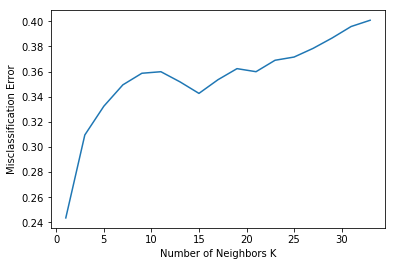

In [91]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [92]:
# New Models

knn2_nm = "K Nearest Neighbors (k=1 optimal)"

# fit KNN
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train) 

# make predictions
knn2_expected = y_test
knn2_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn2_expected, knn2_predicted)))
print(metrics.classification_report(knn2_expected, knn2_predicted))

knn2_accuracy = metrics.accuracy_score(knn2_expected, knn2_predicted)

0.733746130031
accuracy: 0.733746130031
                    precision    recall  f1-score   support

        Accountant       0.72      0.82      0.76        87
  Chief Accountant       0.67      0.71      0.69        49
    Java Developer       0.64      0.62      0.63        26
            Lawyer       1.00      0.87      0.93        45
    Office Manager       1.00      0.35      0.52        20
   Project Manager       0.95      0.54      0.69        35
Software Developer       0.62      0.85      0.72        34
     Web Developer       0.62      0.78      0.69        27

       avg / total       0.77      0.73      0.73       323



### KNN is better, but not good enough.   Let's try changing our vectorizer settings.

In [93]:
# What happens if we use binary instead of counts?

# instantiate vectorizer(s)
cv2 = CountVectorizer(stop_words=my_stopwords,
                     max_df=.9, binary = True)

tfidf2 = TfidfVectorizer(stop_words=my_stopwords,
                     max_df=.9, binary = True)


# fit text
cv_dm2 = cv2.fit_transform(jobdf['JobRequirment'])
tfidf_dm2 = tfidf2.fit_transform(jobdf['JobRequirment'])

print(cv_dm2.shape)

(1074, 3560)


In [94]:
# Test / Train Split

X2 = cv_dm2.toarray() 
print(type(X))

y2 = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(751, 3560)
(323, 3560)
(751,)
(323,)


In [95]:
clf3_nm = "Logistic Regression binary CV"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train2, y_train2)

# make predictions
clf3_expected = y_test2
clf3_predicted = model.predict(X_test2)

print(model.score(X_test2, y_test2))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

clf3_accuracy = metrics.accuracy_score(clf3_expected, clf3_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.851393188854
accuracy: 0.851393188854
                    precision    recall  f1-score   support

        Accountant       0.88      0.85      0.87        87
  Chief Accountant       0.74      0.82      0.78        49
    Java Developer       0.80      0.62      0.70        26
            Lawyer       1.00      1.00      1.00        45
    Office Manager       1.00      0.95      0.97        20
   Project Manager       1.00      0.89      0.94        35
Software Developer       0.75      0.79      0.77        34
     Web Developer       0.68      0.85      0.75        27

       avg / total       0.86      0.85      0.85       323



In [96]:
clf4_nm = "Decision Tree binary CV"

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train2, y_train2)

# make predictions
clf4_expected = y_test2
clf4_predicted = model.predict(X_test2)

print(model.score(X_test2, y_test2))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf4_expected, clf4_predicted)))
print(metrics.classification_report(clf4_expected, clf4_predicted))

clf4_accuracy = metrics.accuracy_score(clf4_expected, clf4_predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.743034055728
accuracy: 0.743034055728
                    precision    recall  f1-score   support

        Accountant       0.74      0.72      0.73        87
  Chief Accountant       0.60      0.73      0.66        49
    Java Developer       0.72      0.50      0.59        26
            Lawyer       0.95      0.93      0.94        45
    Office Manager       0.81      0.65      0.72        20
   Project Manager       0.89      0.71      0.79        35
Software Developer       0.83      0.74      0.78        34
     Web Developer       0.55      0.85      0.67        27

       avg / total       0.76      0.74      0.75       323



### Check results from using binary vector settings

In [97]:
model_name = [clf1_nm, clf2_nm, knn1_nm, knn2_nm, clf3_nm, clf4_nm]
model_accuracy = [clf1_accuracy, clf2_accuracy, knn1_accuracy, knn2_accuracy, clf3_accuracy, clf4_accuracy]

summarydf = pd.DataFrame(model_name, columns=['Model'])
summarydf['Accuracy']=(model_accuracy)
summarydf

,Model,Accuracy
0,Decision Tree (initial),0.789474
1,Logistic Regression initial,0.839009
2,K Nearest Neighbors initial (k=3),0.718266
3,K Nearest Neighbors (k=1 optimal),0.733746
4,Logistic Regression binary CV,0.851393
5,Decision Tree binary CV,0.743034


### How about a bigger training set since the data set is small?

In [98]:
# Test / Train Split

X3 = cv_dm2.toarray() 
print(type(X))

y3 = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(859, 3560)
(215, 3560)
(859,)
(215,)


In [99]:
clf5_nm = "Logistic Regression 80/20, binary = True"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train3, y_train3)

# make predictions
clf5_expected = y_test3
clf5_predicted = model.predict(X_test3)

print(model.score(X_test3, y_test3))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf5_expected, clf5_predicted)))
print(metrics.classification_report(clf5_expected, clf5_predicted))

clf5_accuracy = metrics.accuracy_score(clf5_expected, clf5_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.86976744186
accuracy: 0.86976744186
                    precision    recall  f1-score   support

        Accountant       0.87      0.91      0.89        57
  Chief Accountant       0.82      0.79      0.81        34
    Java Developer       0.83      0.59      0.69        17
            Lawyer       1.00      1.00      1.00        28
    Office Manager       1.00      0.93      0.97        15
   Project Manager       1.00      0.90      0.95        21
Software Developer       0.74      0.92      0.82        25
     Web Developer       0.78      0.78      0.78        18

       avg / total       0.87      0.87      0.87       215



### What about stemming?

In [100]:
# What happens if we use stemming?

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

jobdf['pstem'] = jobdf["JobRequirment"].apply(lambda x: [ps.stem(y) for y in x.split()])
jobdf['pstem']= [" ".join(token) for token in jobdf['pstem']]
#jobdf.head()

In [129]:
# instantiate vectorizer(s)

# fit text
cv_dm = cv2.fit_transform(jobdf['pstem'])
tfidf_dm = tfidf2.fit_transform(jobdf['pstem'])

print(cv_dm.shape)

names = cv2.get_feature_names()

count = np.sum(cv_dm.toarray(), axis = 0).tolist()

count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)


# print(names)

(1074, 3220)


In [103]:
# Test / Train Split

X = cv_dm.toarray() 
print(type(X))

y = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(859, 3220)
(215, 3220)
(859,)
(215,)


In [104]:
clf6_nm = "Logistic Regression 80/20, binary, Stem"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf6_expected = y_test
clf6_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf6_expected, clf6_predicted)))
print(metrics.classification_report(clf6_expected, clf6_predicted))

clf6_accuracy = metrics.accuracy_score(clf6_expected, clf6_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.832558139535
accuracy: 0.832558139535
                    precision    recall  f1-score   support

        Accountant       0.81      0.84      0.83        57
  Chief Accountant       0.74      0.76      0.75        34
    Java Developer       0.82      0.53      0.64        17
            Lawyer       1.00      0.96      0.98        28
    Office Manager       1.00      0.87      0.93        15
   Project Manager       0.95      0.95      0.95        21
Software Developer       0.73      0.88      0.80        25
     Web Developer       0.74      0.78      0.76        18

       avg / total       0.84      0.83      0.83       215



### Lost accuracy.  I think this is because stopwords were not removed prior to stemming.  Try again.

In [105]:
# What happens if we remove stopwords before using stemming?
from nltk.corpus import words

#lowercase
jobdf = jobdf.apply(lambda x: x.astype(str).str.lower())

jobdf['cleantext']=jobdf['JobRequirment']
jobdf['cleantext']=jobdf.cleantext.apply(lambda x: ' '.join([word for word in x.split() if word not in my_stopwords]))

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

jobdf['pstemclean'] = jobdf["cleantext"].apply(lambda x: [ps.stem(n) for n in x.split()])
jobdf['pstemclean']= [" ".join(token) for token in jobdf['pstemclean']]
#jobdf.head()

In [106]:
#jobdf['pstemclean'].head()

In [130]:
# instantiate vectorizer(s)

# fit text
cv_dm = cv2.fit_transform(jobdf['pstemclean'])
tfidf_dm = tfidf2.fit_transform(jobdf['pstemclean'])

print(cv_dm.shape)

names = cv2.get_feature_names()

count = np.sum(cv_dm.toarray(), axis = 0).tolist()

count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)


# print(names)

(1074, 3210)


In [110]:
# Test / Train Split

X = cv_dm.toarray() 
print(type(X))

y = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(859, 3210)
(215, 3210)
(859,)
(215,)


In [111]:
clf7_nm = "Logistic Regression 80/20, Stem, stopwords"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf7_expected = y_test
clf7_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf7_expected, clf7_predicted)))
print(metrics.classification_report(clf7_expected, clf7_predicted))

clf7_accuracy = metrics.accuracy_score(clf7_expected, clf7_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.818604651163
accuracy: 0.818604651163
                    precision    recall  f1-score   support

        accountant       0.81      0.81      0.81        57
  chief accountant       0.70      0.76      0.73        34
    java developer       0.80      0.47      0.59        17
            lawyer       1.00      0.96      0.98        28
    office manager       1.00      0.87      0.93        15
   project manager       0.95      0.95      0.95        21
software developer       0.71      0.88      0.79        25
     web developer       0.74      0.78      0.76        18

       avg / total       0.83      0.82      0.82       215



### Try different vectorizer

In [112]:
# instantiate vectorizer(s)
cv = CountVectorizer(stop_words=my_stopwords,
                     max_df=.9,
                    binary = True)

tfidf = TfidfVectorizer(stop_words=my_stopwords,
                     max_df=.9,
                       binary = True)


# fit text
cv_dm = cv.fit_transform(jobdf['JobRequirment'])
tfidf_dm = tfidf.fit_transform(jobdf['JobRequirment'])

print(cv_dm.shape)

(1074, 3560)


In [113]:
# Test / Train Split

X = tfidf_dm.toarray() 
print(type(X))

y = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(859, 3560)
(215, 3560)
(859,)
(215,)


In [114]:
clf8_nm = "Logistic Regression 80/20, tfidf"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf8_expected = y_test
clf8_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf8_expected, clf8_predicted)))
print(metrics.classification_report(clf8_expected, clf8_predicted))

clf8_accuracy = metrics.accuracy_score(clf8_expected, clf8_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.818604651163
accuracy: 0.818604651163
                    precision    recall  f1-score   support

        accountant       0.74      0.95      0.83        57
  chief accountant       0.88      0.65      0.75        34
    java developer       0.70      0.41      0.52        17
            lawyer       1.00      1.00      1.00        28
    office manager       1.00      0.67      0.80        15
   project manager       0.95      0.95      0.95        21
software developer       0.71      0.80      0.75        25
     web developer       0.75      0.83      0.79        18

       avg / total       0.83      0.82      0.81       215



### Perhaps some custom replacement will help with accuracy

In [115]:
#print(names)

In [116]:
#additional stop words that may improve the model
add_stop = ['00', '09', '10', '14', '18', '20', '2000', '2006', '2007', '2008', '2009', '2010', '220', '228', '24', '3g', '3rd','aghekyan','armenia', 'armenian', 'armenias',
 'ffective','armentel','arzni','boghossian', 'bono', 'asdg','candidate', 'candidates', 'canditate']

my_stopwords = my_stopwords + add_stop

In [117]:
import re

job_dict = {'coordinates':'coordinate','coordinating':'coordinate','entries':'entry','challenges':'challenge',
            'challenging':'challenge','compilation':'compile', 'compiling':'compile', 'completed':'complete', 'completely':'complete',
            'completeness':'complete', 'completing':'complete', 'completion':'complete','cooperation':'cooperate','generally':'general',
           'bookeeping':'book', 'bookkeeper':'book', 'bookkeeping':'book', 'books':'book','complexity':'complex','compliance':'compliant',
            'complies':'compliant','comply':'compliant','complying':'compliant','reconciles':'reconcile', 'reconciliation':'reconcile',
            'reconciling':'reconcile','\r\n':' ','-':' ','\r':' ','\n':' '}


def multiple_replace(dict, text): 
  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [118]:
jobdf['cleantext'] = jobdf.JobRequirment.apply(lambda x: multiple_replace(job_dict, x))

In [119]:
# remove punctuation

#import string

#jobdf['cleantext'] = "".join(l for l in jobdf['cleantext'] if l not in string.punctuation)


In [120]:
#jobdf['cleantext'].head()

In [121]:
# instantiate vectorizer(s)
cv = CountVectorizer(stop_words=my_stopwords,
                     max_df=.9,
                    binary = True)

tfidf = TfidfVectorizer(stop_words=my_stopwords,
                     max_df=.9,
                       binary = True)

# fit text
cv_dm = cv.fit_transform(jobdf['cleantext'])
tfidf_dm = cv.fit_transform(jobdf['cleantext'])

job_dm = tfidf_dm.toarray()

print(cv_dm.shape)

#names = cv.get_feature_names()

#count = np.sum(cv_dm.toarray(), axis = 0).tolist()

#count_df = pd.DataFrame(count, index = names, columns = ['count'])

#count_df.sort_values(['count'], ascending = False).head(20)


(1074, 3529)


In [122]:
# Test / Train Split

X = cv_dm.toarray() 
print(type(X))

y = jobdf['Title'].values #this is an array of labels
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(859, 3529)
(215, 3529)
(859,)
(215,)


In [123]:
clf9_nm = "Logistic Regression 80/20, dict, new stopwords, binary"

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
clf9_expected = y_test
clf9_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf9_expected, clf9_predicted)))
print(metrics.classification_report(clf9_expected, clf9_predicted))

clf9_accuracy = metrics.accuracy_score(clf9_expected, clf9_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.86511627907
accuracy: 0.86511627907
                    precision    recall  f1-score   support

        accountant       0.87      0.91      0.89        57
  chief accountant       0.82      0.79      0.81        34
    java developer       0.90      0.53      0.67        17
            lawyer       1.00      1.00      1.00        28
    office manager       1.00      0.93      0.97        15
   project manager       0.95      0.90      0.93        21
software developer       0.74      0.92      0.82        25
     web developer       0.74      0.78      0.76        18

       avg / total       0.87      0.87      0.86       215



## Which model was the best?

In [124]:
model_name = [clf1_nm, clf2_nm, knn1_nm, knn2_nm, clf3_nm, clf4_nm, clf5_nm, clf6_nm, clf7_nm, clf8_nm, clf9_nm]
model_accuracy = [clf1_accuracy, clf2_accuracy, knn1_accuracy, knn2_accuracy, clf3_accuracy, clf4_accuracy, clf5_accuracy, clf6_accuracy, clf7_accuracy, clf8_accuracy, clf9_accuracy]

summarydf = pd.DataFrame(model_name, columns=['Model'])
summarydf['Accuracy']=(model_accuracy)
summarydf

,Model,Accuracy
0,Decision Tree (initial),0.789474
1,Logistic Regression initial,0.839009
2,K Nearest Neighbors initial (k=3),0.718266
3,K Nearest Neighbors (k=1 optimal),0.733746
4,Logistic Regression binary CV,0.851393
5,Decision Tree binary CV,0.743034
6,"Logistic Regression 80/20, binary = True",0.869767
7,"Logistic Regression 80/20, binary, Stem",0.832558
8,"Logistic Regression 80/20, Stem, stopwords",0.818605
9,"Logistic Regression 80/20, tfidf",0.818605


## Task 3 - K Cluster

In [26]:
#how many clusters? this takes some time

from sklearn.cluster import KMeans

# finding an optimal value for k
k_range = range(1,15)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 42).fit(job_dm) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

In [33]:
# calc euclidean dist from each point to each cluster center
from scipy.spatial.distance import cdist, pdist

k_euclid = [cdist(job_dm, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(job_dm)**2) / job_dm.shape[0]

# between cluster sum of squares
bss = tss - wcss

print(wcss)
print(bss)

[40736.850093109322, 38842.336625729484, 38142.729841131419, 37800.623629931069, 36988.295668000515, 36802.010100074294, 36271.186586563374, 36211.865802503613, 35849.570937094904, 35455.699938821184, 35274.209293426153, 34960.591948314512, 34598.867028532695, 34605.614455878756]
[  5.45696821e-10   1.89451347e+03   2.59412025e+03   2.93622646e+03
   3.74855443e+03   3.93483999e+03   4.46566351e+03   4.52498429e+03
   4.88727916e+03   5.28115015e+03   5.46264080e+03   5.77625814e+03
   6.13798306e+03   6.13123564e+03]


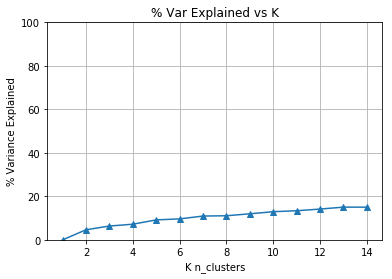

In [32]:
# plot elbow chart
import matplotlib as mpl
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, '^-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

fig

In [71]:


tfidf = TfidfVectorizer(stop_words=my_stopwords, max_df=.9, binary = True)
tfidf_dm = tfidf.fit_transform(jobdf['JobRequirment'])

My_k = 8
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, n_init=1, random_state = 42, verbose=True)
km.fit(tfidf_dm)

clusters = km.labels_.tolist()

jobdf['clusters'] = clusters
print(jobdf['clusters'].value_counts())

Initialization complete
Iteration  0, inertia 1806.606
Iteration  1, inertia 967.466
Iteration  2, inertia 958.202
Iteration  3, inertia 953.876
Iteration  4, inertia 951.672
Iteration  5, inertia 949.839
Iteration  6, inertia 948.230
Iteration  7, inertia 946.728
Iteration  8, inertia 945.462
Iteration  9, inertia 944.931
Iteration 10, inertia 944.741
Iteration 11, inertia 944.719
Iteration 12, inertia 944.710
Converged at iteration 12: center shift 0.000000e+00 within tolerance 2.670418e-08
4    266
2    196
0    185
5    139
3    112
7     91
6     46
1     39
Name: clusters, dtype: int64


In [76]:
clust_8 = jobdf.groupby(['clusters', 'Title']).size().reset_index(name='counts').sort_values(['clusters','counts'])

clust_8

,clusters,Title,counts
0,0,Accountant,1
3,0,Project Manager,2
2,0,Office Manager,41
1,0,Lawyer,141
4,1,Accountant,11
5,1,Chief Accountant,28
9,2,Project Manager,11
8,2,Office Manager,35
6,2,Accountant,74
7,2,Chief Accountant,76
